# 201901575 연수연
## 기말고사 대체 과제
### 인생 영화 선정하여 리뷰데이터를 이용해 워드클라우드 그리기 & 분류기 학습시키기

In [74]:
# 리뷰 데이터

from tqdm.notebook import tqdm
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

tmp_list_text=[]
tmp_list_score=[]

neg_tmp_list_text=[]
negative_review=[1,2,3,4]

# 3086개의 리뷰 데이터
for i in tqdm(range(1,310)):
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=18781&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="+str(i)
    html = urlopen(url)

    soup=BeautifulSoup(html.read(),"html.parser")
    docs = soup.find("div",{"class":"score_result"}).find_all("li")
    for doc in range(0,len(docs)):
        #print(doc)
        ans_text=docs[doc].find("div",{"class":"score_reple"}).find("p").find("span",{"id":"_filtered_ment_"+str(doc)})
        ans_score=docs[doc].find("div",{"class":"star_score"}).find("em")
        
        tmp_list_score.append(ans_score.text)
        
        # 리뷰 데이터 길이가 길어 중간에 잘렸을 경우 
        if ans_text.find("span",{"id":"_unfold_ment"+str(doc)}):
            # a의 data-src 속성 값 가져오기
            #print(ans_text)
            result = ans_text.a['data-src']
            tmp_list_text.append(result.strip())
            
            # 1~4점 negative인 리뷰일 경우
            if int(ans_score.text) in negative_review:
                neg_tmp_list_text.append(result.strip())
            
        else:
            tmp_list_text.append(ans_text.text.strip())
            
            # 1~4점 negative인 리뷰일 경우
            if int(ans_score.text) in negative_review:
                neg_tmp_list_text.append(result.strip())
            
    time.sleep(0.5)
print('tmp list text : ',tmp_list_text)
print(len(tmp_list_text))

print('tmp list score : ',tmp_list_score)
print(len(tmp_list_score))

print('negative tmp list text : ', neg_tmp_list_text)
print(len(neg_tmp_list_text))



tmp list text :  ['이렇게 뛰어난 작화가 어떻게 1988년도작이라니;;같은 년도에 나온 작품이 드래곤볼인데 ㄷㄷ', '토토로의 진실인가 그거 개소리인거 모르고 선동당하는사람이 아직도 있네', '누가 이런 영화를 보고 토토로 괴담을 생각할수 있단 말인가?', '딱히슬픈장면도없는데 눈물이났네요ㅋㅋ몬가 마음이따듯해지고 힐링되는느낌 ㅋㅋㅋㅋ', '20년도 더 지난 영화라는게 충격...지금 봐도 어디하나 빠지는게 없어서 또 한번 충격...너무나 예쁘고 사랑스럽다.', '계속 느끼는 거지만 하야오 만화는 자연이 참 예쁜 것 같다', '난잡한 컴퓨터 그래픽으로 도배된 만화만 보다가 20년도 훨씬 지난 이 만화를 보니 정말 안구정화되고 마음이 편안해지더라.', '진짜 미야자키하야오의 영화는 어디 흠잡을데도 없음 효과도 1988년도 치고 대단함.. 지금으로 쳐도 대단하고 마음이 우울할때나 슬플때 미야자키하야오의 영화를보면 마음이 좋아짐ㅎㅎ이런영화엔 별점10점도 적다', '가슴이 뭉클한건 내가 너무 어른이 되버린 까닭인가.', '토토로 캐릭터 만드는데만 10년. 이런 영화 만들수 있으면 이영화 욕하는 것들 니들이 한번 만들어보시지 못만들면...', '당연히 10점', '너무나도 아름답고 정말 수십번을 다시 봐도 너무나도 감동적인 최고의 영화', '캬~ 진짜 이거나왔을때 이것만 몇번을 봤는지;; 토토로 형제(?)들이 싹틔우려 하는 행동 맨날 따라했는데 ㅋㅋ', '영화를 보고 괴담을 봤다. 내 생각은 이렇다. 미야자키 하야오는 그런 끔찍한 사건이 일어난 것을 매우 슬프게 생각했다. 그래서 자신의 상상력을 동원해서 만약 숲의 정령들이 그들을 보호해 주었다면... 난 괴담을 읽고 난 후 토토로가 따뜻하고 아련하다.', '비오는 날 토토로와 사츠키가 함께 우산 쓰는 장면, 평화로운 시골 풍경, 언제나 멋진 ost까지! 최고의 애니매이션입니다', '정말 이거 만든사람 대단해요. 너무 재미있어요.이거 이제 정말 팬이에요', '중학생때 봤을때는 몰랐는데 엄마가 되고 다시보니 

In [75]:
# 리뷰 점수 알아보기
cnt=[0]*10

for score in tmp_list_score :
    for j in range(1,11):
        if int(score) == j:
            cnt[j-1]+=1
print(cnt)

# 분류기에서 긍정/부정 리뷰 비율을 동일하게 샘플링 하기 위해 개수 확인
#부정 : 1~4점의 개수    
nega_cnt=len(neg_tmp_list_text)
print(nega_cnt)
#긍정 : 9~10점
#긍정이 더 많기 때문에 9점, 10점을 부정 개수의 반반씩 할당할 예정


[72, 14, 14, 12, 28, 51, 85, 229, 242, 2339]
112


In [76]:
# 전체 리뷰 데이터에 대한 처리
from konlpy.tag import Okt
okt = Okt()

ko_doc = '\n'.join(tmp_list_text)
print(ko_doc[:5000])
print(len(ko_doc))

이렇게 뛰어난 작화가 어떻게 1988년도작이라니;;같은 년도에 나온 작품이 드래곤볼인데 ㄷㄷ
토토로의 진실인가 그거 개소리인거 모르고 선동당하는사람이 아직도 있네
누가 이런 영화를 보고 토토로 괴담을 생각할수 있단 말인가?
딱히슬픈장면도없는데 눈물이났네요ㅋㅋ몬가 마음이따듯해지고 힐링되는느낌 ㅋㅋㅋㅋ
20년도 더 지난 영화라는게 충격...지금 봐도 어디하나 빠지는게 없어서 또 한번 충격...너무나 예쁘고 사랑스럽다.
계속 느끼는 거지만 하야오 만화는 자연이 참 예쁜 것 같다
난잡한 컴퓨터 그래픽으로 도배된 만화만 보다가 20년도 훨씬 지난 이 만화를 보니 정말 안구정화되고 마음이 편안해지더라.
진짜 미야자키하야오의 영화는 어디 흠잡을데도 없음 효과도 1988년도 치고 대단함.. 지금으로 쳐도 대단하고 마음이 우울할때나 슬플때 미야자키하야오의 영화를보면 마음이 좋아짐ㅎㅎ이런영화엔 별점10점도 적다
가슴이 뭉클한건 내가 너무 어른이 되버린 까닭인가.
토토로 캐릭터 만드는데만 10년. 이런 영화 만들수 있으면 이영화 욕하는 것들 니들이 한번 만들어보시지 못만들면...
당연히 10점
너무나도 아름답고 정말 수십번을 다시 봐도 너무나도 감동적인 최고의 영화
캬~ 진짜 이거나왔을때 이것만 몇번을 봤는지;; 토토로 형제(?)들이 싹틔우려 하는 행동 맨날 따라했는데 ㅋㅋ
영화를 보고 괴담을 봤다. 내 생각은 이렇다. 미야자키 하야오는 그런 끔찍한 사건이 일어난 것을 매우 슬프게 생각했다. 그래서 자신의 상상력을 동원해서 만약 숲의 정령들이 그들을 보호해 주었다면... 난 괴담을 읽고 난 후 토토로가 따뜻하고 아련하다.
비오는 날 토토로와 사츠키가 함께 우산 쓰는 장면, 평화로운 시골 풍경, 언제나 멋진 ost까지! 최고의 애니매이션입니다
정말 이거 만든사람 대단해요. 너무 재미있어요.이거 이제 정말 팬이에요
중학생때 봤을때는 몰랐는데 엄마가 되고 다시보니 어떤 부분들이 왜케 슬프게 느껴지는지 눈물참느라  혼났네요  아이도 재밌게 본것 같아 좋았어요  센과치히로, 하울, 포뇨,

In [77]:
import time
start = time.time()
ko_doc_noun = okt.nouns(ko_doc)
print(time.time()-start)

3.9115476608276367


In [78]:
# 가장 많이 나온 글자 파악하기
from collections import Counter

count_noun = Counter(ko_doc_noun)
count_noun.most_common(20)

[('영화', 600),
 ('토토', 594),
 ('정말', 217),
 ('때', 217),
 ('최고', 206),
 ('토', 204),
 ('토로', 190),
 ('작품', 182),
 ('감동', 169),
 ('동심', 159),
 ('아이', 156),
 ('다시', 150),
 ('마음', 147),
 ('애니', 145),
 ('애니메이션', 126),
 ('보고', 124),
 ('미야자키', 122),
 ('이', 119),
 ('진짜', 113),
 ('것', 108)]

In [79]:
# stopword 설정하기
stopword_list=['영화','토토로','토토','토로','이웃집 토토로','이웃집','정말','진짜']
for word in count_noun:
    if len(word)==1:
        stopword_list.append(word)
stopword_list[-5:]

['큐', '줫', '화', '혐', '터']

In [80]:
# stopword 단어를 pop()
for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

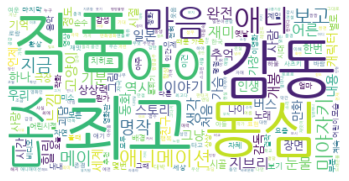

In [81]:
# 전체 리뷰에 대한 wordcloud 그리기
from wordcloud import WordCloud

wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

[('애', 121), ('거', 108), ('원래', 108), ('미화', 108), ('현실', 56), ('토', 55), ('토로', 55), ('거임', 54), ('저승', 54), ('신임', 54), ('고양이', 54), ('버스', 54), ('망자', 54), ('영혼', 54), ('이동', 54), ('수단', 54), ('엄마', 54), ('입원', 54), ('암', 54), ('말기', 54)]


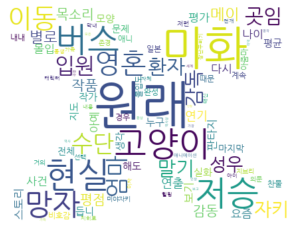

In [108]:
# 부정적인 리뷰 데이터에 대한 처리
from konlpy.tag import Okt
okt = Okt()

neg_ko_doc = '\n'.join(neg_tmp_list_text)
#print(neg_ko_doc[:5000])
#print(len(neg_ko_doc))

import time
start = time.time()
neg_ko_doc_noun = okt.nouns(neg_ko_doc)
#print(time.time()-start)

# 가장 많이 나온 글자 파악하기
from collections import Counter

neg_count_noun = Counter(neg_ko_doc_noun)
print(neg_count_noun.most_common(20))

# stopword 설정하기
stopword_list=['영화','토토로','토토','토로','이웃집 토토로','이웃집','정말','진짜','거임','신임']
for word in neg_count_noun:
    if len(word)==1:
        stopword_list.append(word)
#print(stopword_list[-5:])

# stopword 단어를 pop()
for stopword in stopword_list:
    if stopword in neg_count_noun:
        neg_count_noun.pop(stopword)

# 부정적인 리뷰에 대한 wordcloud 그리기
from wordcloud import WordCloud

#neg_wc_noun = WordCloud(background_color='yellow', max_words=2000, font_path=r'C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf')
#neg_wc_noun = wc_noun.generate_from_frequencies(neg_count_noun)

from PIL import Image
import numpy as np
img_mask=np.array(Image.open('x_image.jpg'))
wc_img=WordCloud(background_color='white', max_words=2000, font_path=r'C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf', mask=img_mask)
wc_img=wc_img.generate_from_frequencies(neg_count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_img, interpolation="bilinear")
plt.axis("off")
plt.show()




In [105]:
from nltk.tokenize import word_tokenize
import nltk

# pos_tokenize 함수
def pos_tokenize(raw_sent):
    pos_sent=[]
    
    sent=okt.pos(raw_sent, norm=True, stem=True)
    
    for tup in sent:
        word, tag = tup[0],tup[1]
        word_tag = word+'/'+tag
        pos_sent.append(word_tag)
    return ' '.join(pos_sent)
    


# 데이터 입력
train=[]

# nega_cnt가 112니까 별점이 9인 것 56개, 10인 것 56개 (비율 맞추기)
pos_9=nega_cnt/2
pos_10=nega_cnt/2

for i in range(len(tmp_list_score)):
    if int(tmp_list_score[i]) in negative_review:
        train.append((tmp_list_text[i],'neg'))
    elif (int(tmp_list_score[i]) == 9) and (pos_9 > 0):
        train.append((tmp_list_text[i],'pos'))
        pos_9-=1
    elif (int(tmp_list_score[i]) == 10) and (pos_10 > 0):
        train.append((tmp_list_text[i],'pos'))
        pos_10-=1
#print(train)



# 단어 set 만들기
all_words=set()
for tup in train:
    sent, label = tup[0], tup[1]
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    for word in words:
        all_words.add(word)
print(all_words)



{'이제/Noun', '클래식/Noun', '영원하다/Adjective', '~~~/Punctuation', '재미나/Noun', '촌/Noun', '내겐/Noun', '하나로/Noun', '살때/Noun', '느낌/Noun', '남기다/Verb', '친구/Noun', '먼지/Noun', '년도/Noun', '안/Noun', '단어/Noun', '태우다/Verb', '부럽다/Adjective', '암/Noun', '은비/Noun', '내/Determiner', '무의미하다/Adjective', '이/Suffix', '좋다/Adjective', 'kljujhkytiurt/Alpha', '우울하다/Adjective', '빼다/Verb', '이에요/Josa', '기분/Noun', '으론/Josa', '전/Noun', '잠깐/Noun', '보은/Noun', '보여주다/Verb', '많이/Modifier', '바보/Noun', '같이/Adverb', '어필/Noun', '아무/Modifier', '성매매/Noun', '마/Noun', '찾다/Verb', '보기/Noun', '꽤/Noun', '누구/Noun', '도/Josa', '대단하다/Adjective', '작화/Noun', '정원/Noun', '얼마나/Noun', '나다/Verb', '저리/Noun', '가볍다/Adjective', '여러/Modifier', '선동/Noun', '순수/Noun', '영/Modifier', '도/Noun', '귀/Modifier', '이나/Josa', '그걱/Noun', '뭐/Noun', '밑/Noun', '어울리다/Verb', '힐링/Noun', 'ㅎㅎ/KoreanParticle', '병원/Noun', '빨임/Noun', '본/Modifier', '치다/Verb', '이/Foreign', '해주다/Verb', '경직/Noun', '입원/Noun', '1시간/Number', '만난/Noun', '전반/Noun', '왜놈/Noun', '즉/Noun', '엄마/Noun', '어이없다/A

In [93]:
train_features=[]
for tup in train:
    sent, label = tup[0], tup[1]
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    tmp={set_word: (set_word in words) for set_word in all_words}
    sent_tup = (tmp, label)
    train_features.append(sent_tup)
    
#for i in range(len(train_features)):
#    print(train_features[i])


In [94]:
classifier = nltk.NaiveBayesClassifier.train(train_features)
classifier.show_most_informative_features()

Most Informative Features
                 마음/Noun = True              pos : neg    =      6.3 : 1.0
            1988년/Number = True              pos : neg    =      5.0 : 1.0
                 다시/Noun = True              pos : neg    =      5.0 : 1.0
                 되다/Verb = True              pos : neg    =      5.0 : 1.0
          순수하다/Adjective = True              pos : neg    =      5.0 : 1.0
                 정말/Noun = True              pos : neg    =      4.6 : 1.0
                다/Adverb = True              neg : pos    =      4.3 : 1.0
               돌아가다/Verb = True              pos : neg    =      4.3 : 1.0
                 시절/Noun = True              pos : neg    =      4.3 : 1.0
                 재미/Noun = True              neg : pos    =      4.3 : 1.0


In [95]:
test_sent = '그 시절로 돌아간 것 같은 기분이 든다.'

test_sent = pos_tokenize(test_sent)
words=word_tokenize(test_sent)
test_feature = {set_word: (set_word in words) for set_word in all_words}
#print(test_feature)

classifier.classify(test_feature)

'pos'

In [96]:
test_sent2 = '글쎄.. 생각보단 별로였음'

test_sent2 = pos_tokenize(test_sent2)
words2=word_tokenize(test_sent2)
test_feature2 = {set_word2: (set_word2 in words2) for set_word2 in all_words}
#print(test_feature2)

classifier.classify(test_feature2)

'neg'

In [97]:
test_sent3 =  '애니메이션을 보면 동심이 몽글몽글'
test_sent3 = pos_tokenize(test_sent3)
words3=word_tokenize(test_sent3)
test_feature3 = {set_word3: (set_word3 in words3) for set_word3 in all_words}
#print(test_feature3)

classifier.classify(test_feature3)

'pos'

In [109]:
test_sent4 =  '이거 원래 토토로가 죽은 아이들 데리고가는 거라던데 '
test_sent4 = pos_tokenize(test_sent4)
words4=word_tokenize(test_sent4)
test_feature4 = {set_word4: (set_word4 in words4) for set_word4 in all_words}
#print(test_feature4)

classifier.classify(test_feature4)

'neg'

# 1. 리뷰 데이터 상세 분석

영화 '이웃집 토토로'에 관한 리뷰를 분석함
전체 리뷰 개수가 1000~5000개 사이인 3086개였기 때문에, 그대로 모두 가져와서 사용했다.

- 리뷰 텍스트와 점수 모두 score_result class 내부에 있었다.
- 리뷰 텍스트는 그 중 score_reple , p 안의 span id가  _filtered_ment_숫자에 텍스트가 있었다.
- 리뷰 점수는 star_score class의 em 안에 있었다.

여기서 리뷰 텍스트의 경우 텍스트의 길이가 일정길이 이상 넘어 갈 경우에 텍스트 값이 다 보이지 않고 접혀있다. 전체 텍스트 내용은 data-src 에 있기 때문에, 이부분을 처리해 주기 위해 result = ans_text.a['data-src'] 를 이용해 data-src에 있는 텍스트를 리스트에 넣을 수 있도록 처리했다.

대체적으로 긍정적인 리뷰 데이터가 많았기 때문에 이후 부정적인 리뷰 데이터의 워드클라우드를 따로 확인하기 위해 부정적인 리뷰 데이터(1~4점)만 모은 리스트를 만들었다.


리뷰 점수의 개수를 각각 세어 본 결과
[72, 14, 14, 12, 28, 51, 85, 229, 242, 2339] 가 나온 것을 확인할 수 있다.

리스트 안 첫번째 원소부터 리뷰1점, 리뷰 2점, 리뷰3점 ... 의 개수이다.
10점이 2339개로 가장 많은 것을 알 수 있었고, 그 다음으로 8점과 9점이 비슷하게 229개, 242개가 나온 것을 확인할 수 있었다.
4점이 가장 적게 나왔으며 대체적으로 낮은 점수보다는 높은 점수를 많이 준 것을 알 수 있다.

most_common을 사용하여 리뷰 데이터에서 많이 나온 단어를 확인 할 수 있었다.
먼저 전체 리뷰 텍스트에 관한 내용이다.
토토로 영화이다 보니 영화, 토토와 같은 연관 단어가 많이 나왔으며, 최고, 동심, 다시, 아이, 애니메이션과 같은 단어도 많이 나온 것을 알 수 있다. 토토로의 경우 아이들이 자주 보는 애니메이션 영화기도 해서 어린이와 관련된 용어가 많이 나온 것 같다. 또한 개봉한 지 꽤 오래 된 영화이다보니까 '다시'라는 단어가 많이 나와 다시 보았다거나, 다시 보고싶다는 뜻으로 해당 단어도 많이 나온 것 같다.

반면 부정적인 리뷰 데이터에 관한 내용을 살펴보았다.
애, 미화, 저승, 현실, 영혼 등과 같은 내용들이 많이 나온 것을 알 수 있다. 토토로의 경우 예전부터 토토로에 관한 괴담들이 많이 있었는데, 괴담과 관련한 내용들과 감독에 관한 내용들로 인해 부정적인 리뷰가 많이 나온 것을 알 수 있다.


# 2. 워드 클라우드 그리기

리뷰데이터가 긍정적인 부분이 많아서 전체 리뷰데이터에 대한 워드 클라우드와, 부정적인 리뷰에 대한 워드 클라우드를 표현해보고 싶었다.

전체 리뷰데이터에 경우 stopword 처리를 할 때 영화, 토토로와 같은 단어 외에 정말, 진짜와 같은 단어도 빼서 처리했다. 
워드 클라우드를 보면 최고, 동심, 다시, 감동, 아이, 마음과 같은 단어가 눈에 띈다. 전체적인 단어들의 분위기를 보면 해당 영화가 아이와 관련 한 감정들이 많으며 작품을 보면 어린 아이처럼 동심이 느껴진다는 느낌의 단어가 전체적으로 많다.

반면 부정적인 리뷰에 대한 워드 클라우드는 X자의 이미지를 이용하여 표현해보고 싶었다.
stopword 처리를 할때 전체 리뷰데이터와 같이 영화, 토토로, 한글자등의 단어를 뺐고, 여기서는 ~거임 등의 어투가 나타나서 거임,신임 등의 단어도 빼주었다.
부정적인 리뷰 데이터에 관한 워드 클라우드를 보면 most common을 통해 알아본 것과 비슷하게 미화, 현실, 영혼, 망자, 입원, 원래 등 과 같은 단어가 크게 보인다. 전체 리뷰데이터와는 확연히 다른 모습을 볼 수 있는데, 앞서 말했듯이 대부분 괴담과 관련한 내용이 들어갔기 때문이다. 그래서 전체 리뷰와는 전혀 다르게 어린이나 동심의 모습과는 다르게 으스스하고 괴담같은 느낌의 단어들이 많이 보이는 것을 확인할 수 있다. 이 외에도 영화에 나오는 단어들인 고양이, 버스 등의 단어도 종종 볼 수 있다.

# 3. 분류기 학습시키기

분류기를 학습시키기 위해 train에 데이터를 처리하는 과정이 필요하다.
앞서 부정적인 리뷰데이터를 따로 분류해놓았었는데, 이것의 개수를 확인해보면 112개 인 것을 볼 수 있다.
학습을 시킬 때 긍정과 부정의 비율을 맞추기 위하여 별점이 9인 것 56개, 별점이 10인 것 56개를 학습시킨다.
그래서 비율을 맞추어 train 시킨다.
또한 pos_tokenize 함수를 통해 문장을 형태소 단위로 분리해주는 작업을 수행하였다.

해당 train 데이터를 이용하여 학습시키고 가장 informative한 features를 본다. 마음이란 단어가 포함되어 있을 때 positive일 경우가 높다. (6.3 : 1.0) 나머지 단어들의 경우도 나와있다.

학습시킨 분류기를 확인하기 위해 4가지 test case를 두었다.
positive한 문장 2가지와 negative한 문장 2가지를 통해 test case를 실행해보았다.
- positive한 문장은 '그 시절로 돌아간 것 같은 기분이 든다.', '애니메이션을 보면 동심이 몽글몽글'
- negative한 문장은 '글쎄.. 생각보단 별로였음', '이거 원래 토토로가 죽은 아이들 데리고가는 거라던데 '

positive한 문장을 test했을 때, 시절이나 애니메이션 동심과 같은 단어들이 들어가서 학습된 데이터들을 통해 올바르게 구분해냈다.
마찬가지로 negative한 문장을 test했을 때, 별로라는 내용이나 괴담에 관한 단어들이 들어가서 학습된 데이터를 통해 올바르게 구분한 것을 확인할 수 있다.
